# ChessBoard representation
#### Example: 8x8 board
>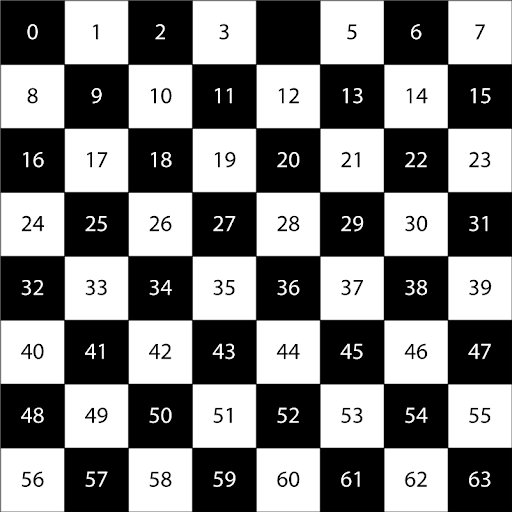
>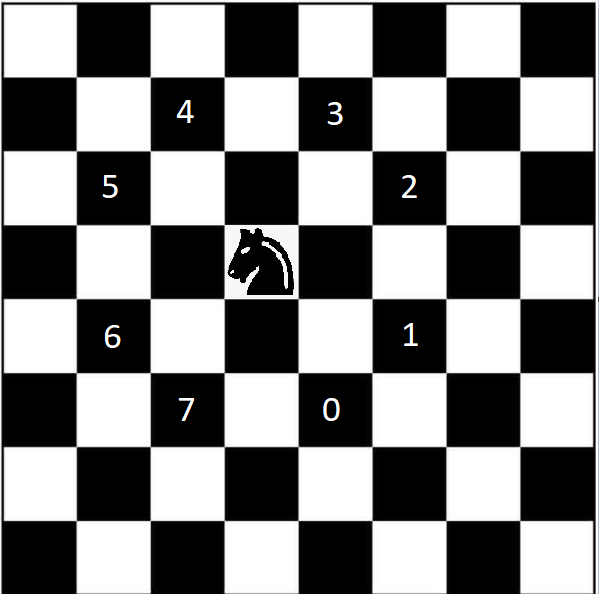


In [387]:
import random
from IPython.display import clear_output


In [388]:
POPULATION_SIZE = 100
ChessBoard_Size=8 #ChessBoard Size
NB_GENES = (ChessBoard_Size*ChessBoard_Size)  #Nb_Gene size = number_of moves
MUTATION_RATE = 0.8
CROSSING_RATE = 0.85
TOURNAMENT_SELECTION_SIZE = 4

# input initial knight position
while True:
    print("Knight position [0..%s] As shown in the picture above"%(ChessBoard_Size*ChessBoard_Size))
    knight_position = int(input()) 
    if(knight_position in range(0,NB_GENES)):
        break

Knight position [0..64] As shown in the picture above


 0


In [389]:
class Chromosome:
    '''Chromosome Init'''
    def __init__(self):
        self.genes = []
        i = 0
        while i < NB_GENES:
            self.genes.append(random.randint(0,7))
            i += 1
            
        self.fitness = self.get_fitness()


    '''Chromosome Get Value'''
    def get_genes(self):
        return self.genes

    '''Chromosome Fitness'''
    def legal_move(self, move , current_x, current_y, prev):
        move_x=[1,2,2,1,-1,-2,-2,-1]
        move_y=[2,1,-1,-2,-2,-1,1,2]
        
        current_x=current_x+move_x[move]
        current_y=current_y+move_y[move]
        pos=current_y*ChessBoard_Size+current_x
        
        legal=True
        if current_x<0 or current_y<0 or current_x>ChessBoard_Size-1 or current_y>ChessBoard_Size-1:
            legal=False
            return current_x, current_y, legal
        
        for j in range(len(prev)):
            if(pos == prev[j]):
                legal=False
                break
        return current_x, current_y, legal
    
    def number_of_legal_moves(self, current_x, current_y, prev):
        j=0
        k=0
        while  j<8:
            x, y, legal = self.legal_move(j , current_x, current_y, prev)
            if legal:
                k=k+1
            j=j+1
        return k;
    
    def get_fitness(self):
        # this init is very important
        self.fitness = 0
        move_x=[1,2,2,1,-1,-2,-2,-1]
        move_y=[2,1,-1,-2,-2,-1,1,2]
        prev = [knight_position]
        current_x=knight_position%ChessBoard_Size
        current_y=knight_position//ChessBoard_Size
       
        i=0
        while i<NB_GENES:        
            move=self.genes[i]
            x, y, legal = self.legal_move(move , current_x, current_y, prev)    
            
            j=0
            min_moves=8
            min_j=0
            if not legal:
                while not legal and j<8:
                    x, y, legal = self.legal_move(j, current_x, current_y, prev)
                    if legal:
                        k=self.number_of_legal_moves(current_x+move_x[j], current_y+move_y[j],prev)
                        if k<min_moves:
                            min_moves=k
                            min_j=j
                    j=j+1

                if  legal:
                    self.genes[i]   =min_j
                    current_x=x;
                    current_y=y;
                else:
                    break
            else:
                current_x=x;
                current_y=y;
                
            
            pos=current_y*ChessBoard_Size+current_x
            prev.append(pos)
            i+=1
                
            self.fitness+=1
        return self.fitness
    
    

    def __str__(self):
        return self.genes.__str__()


In [390]:
a=5
s=bin(a)[2:]
print(s[2])

1


In [391]:
class Population:
    '''Population Init'''
    def __init__(self, size):
        self.chromosomes = []
        i = 0
        while i < size :
            self.chromosomes.append( Chromosome() )
            i += 1
        self.chromosomes.sort(key=lambda x: x.get_fitness(), reverse=True)

    '''Get All Population Chromosomes'''
    def get_chromosomes(self):
        return self.chromosomes

    def print_population(self, gen_number):
        print("\n-----------------------Generation Summary---------------------------")
        print("--------------------------------------------------------------------")
        print("Generation #", gen_number, "| Fittest chromosome fitness:", self.get_chromosomes()[0].get_fitness())
        print("--------------------------------------------------------------------")
        i = 0
        for x in self.get_chromosomes():
            print("Chromosome #",i," :",x,"| Fitness", x.get_fitness())
            i += 1
    def get_max_fitness(self):
        return self.get_chromosomes()[0].get_fitness()

In [392]:
population= Population(10)
population.print_population(0)


-----------------------Generation Summary---------------------------
--------------------------------------------------------------------
Generation # 0 | Fittest chromosome fitness: 53
--------------------------------------------------------------------
Chromosome # 0  : [0, 0, 1, 0, 2, 4, 3, 4, 6, 0, 1, 6, 3, 3, 5, 0, 3, 6, 6, 0, 6, 0, 2, 1, 4, 3, 4, 5, 0, 5, 7, 6, 0, 2, 0, 2, 4, 1, 7, 5, 6, 4, 1, 6, 4, 1, 3, 5, 3, 0, 6, 3, 1, 1, 4, 2, 6, 0, 3, 0, 3, 1, 6, 5] | Fitness 53
Chromosome # 1  : [1, 0, 0, 7, 2, 1, 4, 3, 4, 5, 7, 7, 5, 0, 1, 1, 2, 4, 3, 4, 6, 5, 7, 2, 0, 0, 0, 3, 5, 7, 4, 2, 1, 4, 3, 6, 0, 3, 5, 7, 4, 6, 0, 0, 0, 5, 4, 3, 4, 7, 4, 2, 6, 6, 6, 4, 2, 6, 2, 1, 5, 6, 1, 1] | Fitness 50
Chromosome # 2  : [0, 0, 6, 0, 2, 1, 2, 4, 3, 4, 6, 0, 1, 4, 6, 7, 6, 1, 2, 1, 4, 5, 6, 3, 0, 1, 4, 4, 5, 2, 0, 5, 2, 1, 7, 0, 7, 4, 5, 0, 6, 4, 3, 4, 1, 2, 2, 6, 1, 6, 6, 4, 1, 4, 3, 7, 0, 6, 4, 4, 4, 5, 7, 7] | Fitness 47
Chromosome # 3  : [0, 2, 0, 0, 0, 3, 4, 3, 5, 0, 7, 0, 3, 5, 0, 5, 3, 0,

In [393]:
def select_Wheel(pop):
    partialSum = 0
    sumFitness = 0
    for chromosome in pop.get_chromosomes():
        sumFitness += chromosome.get_fitness()

    randomShot = random.random() * sumFitness

    i = -1
    while partialSum < randomShot and i < POPULATION_SIZE-1 :
        i += 1
        partialSum += pop.get_chromosomes()[i].get_fitness()

    return pop.get_chromosomes()[i]


In [394]:
def select_tournament(pop):
    tournament_pop = Population(0)
    i = 0
    while i < TOURNAMENT_SELECTION_SIZE :
        tournament_pop.get_chromosomes().append(pop.get_chromosomes()[random.randrange(0,POPULATION_SIZE)])
        i += 1
    tournament_pop.get_chromosomes().sort(key=lambda x: x.get_fitness(), reverse=True)
    return tournament_pop.get_chromosomes()[0]

In [395]:

def crossover_chromosomes(parent1, parent2):
    if random.random() < CROSSING_RATE: 
        child1 = Chromosome()
        child2 = Chromosome()

        '''One Point Cross Over'''
        index = random.randrange(1, NB_GENES)
        child1.genes = parent1.get_genes()[:index] + parent2.get_genes()[index:]
        child2.genes = parent2.get_genes()[:index] + parent1.get_genes()[index:]

        
        return child1, child2
    else:
        return parent1, parent2


In [396]:
def mutate_chromosome(chromosome):
    if random.random() < MUTATION_RATE:
        #print("\nMaking a mutation")
       

        random_bit_position = random.randrange(0,NB_GENES)
        chromosome.get_genes()[random_bit_position] == random.randint(0,7)
        


In [397]:
'''Population evolution Cross Over --> Mutation'''
def evolve(pop):
    new_pop = Population(0)
    #'''Keep The Fittests Chromosomes'''
    #for i in range(NUMBER_OF_ELITE_CHROMOSOMES):
    #    new_pop.get_chromosomes().append(pop.get_chromosomes()[i])

    print("\nCrossover and Mutation Trace:")
    while new_pop.get_chromosomes().__len__() < POPULATION_SIZE:
        parent1 = select_Wheel(pop)
        parent2 = select_Wheel(pop)
       
        child1, child2 = crossover_chromosomes(parent1, parent2)


        mutate_chromosome(child1)
        mutate_chromosome(child2)


        new_pop.get_chromosomes().append(child1)

        # make sure to not depass the population size if we keep the elite
        if len(new_pop.get_chromosomes()) < POPULATION_SIZE:
            new_pop.get_chromosomes().append(child2)

    new_pop.get_chromosomes().sort(key=lambda x: x.get_fitness(), reverse=True)   
    return new_pop


In [398]:
import time
generation_number = 0
MAX_FITNESS = ChessBoard_Size*ChessBoard_Size-1
population = Population(POPULATION_SIZE)
population.print_population(generation_number)

while population.get_chromosomes()[0].get_fitness() < MAX_FITNESS and generation_number<500:
    
    generation_number += 1
    population = evolve(population)
    clear_output(wait=True)

    population.print_population(generation_number)



-----------------------Generation Summary---------------------------
--------------------------------------------------------------------
Generation # 114 | Fittest chromosome fitness: 63
--------------------------------------------------------------------
Chromosome # 0  : [0, 1, 0, 0, 2, 4, 7, 1, 4, 3, 4, 5, 0, 2, 7, 0, 5, 6, 0, 2, 3, 6, 0, 5, 4, 2, 5, 0, 5, 6, 0, 1, 4, 4, 3, 1, 3, 0, 3, 6, 1, 4, 6, 5, 6, 1, 3, 6, 7, 0, 0, 5, 3, 4, 3, 1, 0, 6, 0, 6, 4, 1, 6, 5] | Fitness 63
Chromosome # 1  : [0, 1, 0, 0, 2, 4, 7, 1, 4, 3, 4, 5, 0, 2, 7, 0, 5, 6, 0, 2, 3, 6, 0, 5, 4, 2, 5, 0, 5, 6, 0, 1, 4, 4, 3, 1, 3, 0, 3, 6, 1, 4, 6, 5, 6, 1, 3, 6, 7, 1, 2, 4, 5, 7, 0, 0, 5, 0, 2, 5, 0, 5, 5, 5] | Fitness 62
Chromosome # 2  : [0, 1, 0, 0, 2, 4, 7, 1, 4, 3, 4, 5, 0, 2, 7, 0, 5, 6, 0, 2, 3, 6, 0, 5, 4, 2, 5, 0, 5, 6, 0, 1, 4, 4, 3, 1, 3, 0, 3, 6, 5, 6, 7, 0, 0, 5, 3, 0, 5, 0, 2, 4, 2, 4, 5, 0, 5, 2, 1, 2, 0, 7, 5, 5] | Fitness 61
Chromosome # 3  : [0, 1, 0, 0, 2, 4, 7, 1, 4, 3, 4, 5, 0, 2, 7, 0, 5, 